In [82]:
# import module list is independent on respective file.
import yfinance as yf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from datetime import datetime as dt
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from scipy.stats import mstats
import japanize_matplotlib
from tqdm.notebook import tqdm



In [83]:
# load correct trading day format

csv_file_path = './data/Train_data.csv' 
Train_data = pd.read_csv(csv_file_path, index_col=0, thousands=",", parse_dates=True) 
# read different lenghth for cutting
skip_to_date = "2005-10-01" 


# input the ticker
ticker = "IYR" #Real Estate SPDR  



#     Load saved share price file
#file_path = '~/data/' #ダウンロードした人用
file_path = './data/' #自分用
file_name = ticker
file_extension = '.csv'
price_list = pd.read_csv(file_path + file_name + file_extension,thousands=",", index_col=0, parse_dates=True)           

In [84]:
# use correct format's index to retrieve the trading data
post_fundamental = Train_data[skip_to_date:]  

idx = np.searchsorted(price_list.index, post_fundamental.index)
#documents = _list.iloc[idx]
fold_index= 3

In [85]:
def folding_train_data(df, index2):
    try:
        if "index" in df.columns.to_list():
            name = "index"
        else:
            df = df.reset_index(drop=False)
            name = "Date"
        df = df[df.index % index2==0]
        
        
        
    except Exception as e:
        raise e
    else:
        
        df.set_index(name,drop=True, inplace=True)
    
    return df 




In [86]:
fold_index= 3
#post_fundamental.rename_axis('Date', inplace=True)
post_fundamental = post_fundamental.asfreq(str(fold_index)+'M')

In [87]:
post_fundamental

,Monthly Open,futures,Outlays - Receipts,US Bond,Outlays,Receipts,Government Account Series,State and Local Government Series,Principal Amount Balance,Net Unamortized Amount Balance,Saving Bond typeI,Principal Amount Increase,Net Unamortized Amount Increase,Principal Amount Decrease,Net Unamortized Amount Decrease,Accrued Interest Balance,Accrued Interest Increase,Accrued Interest decrease
Date,,,,,,,,,,,,,,,,,,
2005-10-31,2005/10/1,108.45,47277,4.559,196764,149488,3426716.0,226929,4650516.0,-35994.0,1.436727e+08,332366.0,-3317.0,283089.0,-2854.0,42249.0,14724.0,7436.0
2006-01-31,2006/1/1,108.44,-20964,4.527,209045,230010,3523210.0,233441,4724637.0,-36859.0,3.215712e+08,347391.0,-3440.0,337575.0,-3407.0,42944.0,10920.0,8172.0
2006-04-30,2006/4/1,105.58,-118841,5.069,196249,315090,3589106.0,238663,4819949.0,-38281.0,9.420792e+07,296608.0,-3287.0,349144.0,-3966.0,45576.0,14400.0,5445.0
2006-07-31,2006/7/1,106.03,33164,4.988,192925,159761,3683171.0,237425,4819732.0,-38218.0,1.446631e+07,330464.0,-4380.0,307936.0,-4307.0,45001.0,16296.0,12081.0
2006-10-31,2006/10/1,108.22,49321,4.606,217014,167693,3762745.0,241728,4880611.0,-39754.0,1.490999e+07,346502.0,-3661.0,309012.0,-4072.0,45743.0,15541.0,10917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,2022/10/1,110.88,87874,4.077,406374,318500,7188183.0,104454,24352542.0,-82031.0,6.781886e+09,1330585.0,-19138.0,1277236.0,-8788.0,94100.0,31762.0,18845.0
2023-01-31,2023/1/1,115.08,38784,3.529,486072,447288,7024099.0,99115,24583994.0,-88947.0,4.223309e+09,1774182.0,-13074.0,1707781.0,-13278.0,101418.0,33289.0,31384.0
2023-04-30,2023/4/1,116.02,-176181,3.452,462340,638520,6863185.0,102242,24605068.0,-94243.0,1.243796e+09,1222791.0,-14833.0,1311238.0,-15701.0,123653.0,45645.0,14765.0


In [88]:
DS = post_fundamental.loc[:,'Outlays - Receipts'].values

US_Bond = post_fundamental.loc[:,'US Bond'].values
Futures = post_fundamental.loc[:,'futures'].values

Receipts = post_fundamental.loc[:,'Receipts'].values

Outlays = post_fundamental.loc[:,'Outlays'].values

SLGS = post_fundamental.loc[:,'State and Local Government Series'].values

GAS = post_fundamental.loc[:,'Government Account Series'].values


PAB = post_fundamental.loc[:,'Principal Amount  Balance'].values
AIPA = post_fundamental.loc[:,'Accrued Interest Balance'].values

NUAB = post_fundamental.loc[:,'Net Unamortized Amount Balance'].values





SBI = post_fundamental.loc[:,'Saving Bond typeI'].values


PAI = post_fundamental.loc[:,'Principal Amount Increase'].values
AII = post_fundamental.loc[:,'Accrued Interest Increase'].values
NUAI = post_fundamental.loc[:,'Net Unamortized Amount Increase'].values

PAD = post_fundamental.loc[:,'Principal Amount Decrease'].values
AID = post_fundamental.loc[:,'Accrued Interest decrease'].values
NUAD = post_fundamental.loc[:,'Net Unamortized Amount Decrease'].values



In [ ]:
file_name

In [89]:
# Goal is to anticipate the sign of future rate change from the financial data of the current monthly.
# If the future changes is + , we assign 1, otherwise 0,  to Future change value of the current quarter


# Returned Sales Amount.

# predict the FFO direction

data_2 = []
data_2 = pd.DataFrame(data_2)

# 2023 09 DS, Receipts, GAS, NUA
# 2023 09 DS Receipts Bond NUAB
data_2['DS'] = DS

data_2['SLGS'] = SLGS
data_2["GAS"] = GAS
data_2['Receipts'] = Receipts

# Principal Amount Balance
data_2['PAB'] = PAB
data_2['AIB'] = AIPA



#data_2['Bond'] = Bond
'''
data_2['Bill2'] = Bill2
data_2['Note2'] = Note2
data_2['Bond2'] = Bond2
'''
data_2['NUAB'] = NUAB
data_2['SBI'] = SBI

data_2['AII'] = AII
data_2['PAI'] = PAI
data_2['NUAI'] = NUAI

data_2['PAD'] = PAD 
data_2['AID'] = AID
data_2['NUAD'] = NUAD

In [69]:
data_2.corr()

,DS,SLGS,GAS,Receipts,PAB,AIB,NUAB,SBI,AII,PAI,NUAI,PAD,AID,NUAD
DS,1.000000,-0.088845,0.135903,-0.578898,0.158627,0.140811,0.038232,-0.128920,0.094666,0.433233,0.110608,0.207820,0.016536,0.020372
SLGS,-0.088845,1.000000,-0.798523,-0.361874,-0.768341,-0.757932,0.205057,-0.178342,-0.597387,-0.482677,0.173512,-0.532680,-0.359217,0.149711
GAS,0.135903,-0.798523,1.000000,0.518055,0.979249,0.951749,-0.502775,0.466290,0.859048,0.779246,-0.472857,0.838207,0.528196,-0.430222
Receipts,-0.578898,-0.361874,0.518055,1.000000,0.537749,0.510994,-0.275903,0.363408,0.514124,0.352693,-0.293614,0.504425,0.276461,-0.241304
PAB,0.158627,-0.768341,0.979249,0.537749,1.000000,0.960697,-0.496131,0.478473,0.881813,0.804591,-0.477222,0.865205,0.511957,-0.437707
AIB,0.140811,-0.757932,0.951749,0.510994,0.960697,1.000000,-0.600282,0.396054,0.887730,0.752814,-0.537525,0.826141,0.492110,-0.554439
NUAB,0.038232,0.205057,-0.502775,-0.275903,-0.496131,-0.600282,1.000000,-0.399031,-0.610824,-0.492941,0.935119,-0.567017,-0.582177,0.960027
SBI,-0.128920,-0.178342,0.466290,0.363408,0.478473,0.396054,-0.399031,1.000000,0.418703,0.288292,-0.437898,0.335395,0.259858,-0.265478
AII,0.094666,-0.597387,0.859048,0.514124,0.881813,0.887730,-0.610824,0.418703,1.000000,0.716173,-0.585587,0.772158,0.687774,-0.562822
PAI,0.433233,-0.482677,0.779246,0.352693,0.804591,0.752814,-0.492941,0.288292,0.716173,1.000000,-0.467018,0.925152,0.566181,-0.503878


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)  # PCA を行ったり PCA の結果を格納したりするための変数を、pca として宣言
a=pca.fit(data_2)  # PCA を実行
a

PCA(n_components=7)

In [18]:
loadings = pd.DataFrame(pca.components_.T, index=data_2.columns)
loadings

,0,1,2,3,4,5,6
DS,-0.000017,0.006609,0.198951,0.012671,0.678206,-0.190189,-0.670604
SLGS,-0.000011,-0.009790,0.064966,0.064663,-0.035458,-0.042197,-0.016753
GAS,0.000418,0.153965,-0.102285,-0.977921,-0.019281,-0.019116,-0.062677
Receipts,0.000043,0.009752,-0.044240,0.049681,-0.541594,0.481721,-0.675055
PAB,0.002688,0.983877,-0.071150,0.161119,0.025334,0.006872,0.015219
AIB,0.000007,0.002910,-0.002746,-0.003788,-0.001439,-0.006338,0.001213
NUAB,-0.000007,-0.001194,-0.012482,0.011174,0.019986,0.035988,-0.136611
SBI,0.999996,-0.002725,0.000072,-0.000011,0.000021,-0.000012,-0.000007
AII,0.000003,0.001196,0.000192,0.001170,-0.002528,0.002587,0.009861
PAI,0.000127,0.066878,0.823546,-0.101959,0.108518,0.501589,0.205698


In [19]:
score = pd.DataFrame(pca.transform(data_2), index=data_2.index)
score

,0,1,2,3,4,5,6
0,-2.121385e+08,-8.215996e+06,127312.466095,512717.300042,70385.758841,-8964.034727,48290.404883
1,-3.424047e+07,-8.608515e+06,148414.236291,429432.518832,-40669.590434,8899.518831,28927.846526
2,-2.616026e+08,-7.887527e+06,59741.759489,391088.615855,-167991.572837,36929.491050,23919.511481
3,-3.413439e+08,-7.656624e+06,88351.048672,291274.945539,39262.456404,-22163.501170,34863.529729
4,-3.409000e+08,-7.584404e+06,92818.142241,222474.093390,46996.096423,-15455.636820,17761.881250
...,...,...,...,...,...,...,...
68,6.426105e+09,-6.214150e+06,139970.050898,-181652.703993,203033.829684,-135221.176659,-806.762931
69,3.867539e+09,1.017522e+06,525836.750682,-3933.327766,-103356.422636,-102696.796889,8528.033641
70,8.880362e+08,9.073485e+06,-380681.779678,258967.217912,-279821.204597,66559.412064,-2367.258096
71,-2.630792e+08,1.339210e+07,63511.019509,68450.697859,145291.021621,-37592.225580,66908.472364


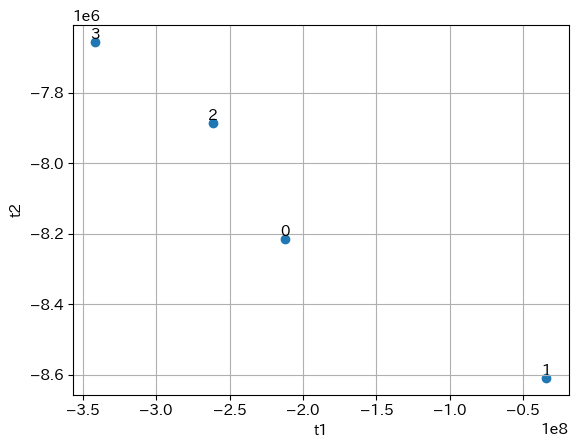

In [21]:
num = 4  # 可視化するデータ数を指定
plt.scatter(score.iloc[:num,0], score.iloc[:num,1]) 
plt.rcParams["font.size"] = 11
# プロットしたデータにサンプル名をラベリング
for i in range(num):
    plt.text(score.iloc[i,0], score.iloc[i,1], score.index[i], horizontalalignment="center", verticalalignment="bottom")

plt.xlabel("t1")
plt.ylabel("t2")
plt.grid()
plt.show()

In [22]:
# 寄与率を算出
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)
contribution_ratios

,0
0,9.999747e-01
1,2.513510e-05
2,9.249806e-08
3,3.192634e-08
4,2.467846e-08
5,6.876552e-09
6,1.351953e-09


In [23]:
# 累積寄与率を算出（.cusum()で累積和を計算 .sum()では総和しか得られない）
cumulative_contribution_ratios = contribution_ratios.cumsum()
cumulative_contribution_ratios

,0
0,0.999975
1,1.000000
2,1.000000
3,1.000000
4,1.000000
5,1.000000
6,1.000000


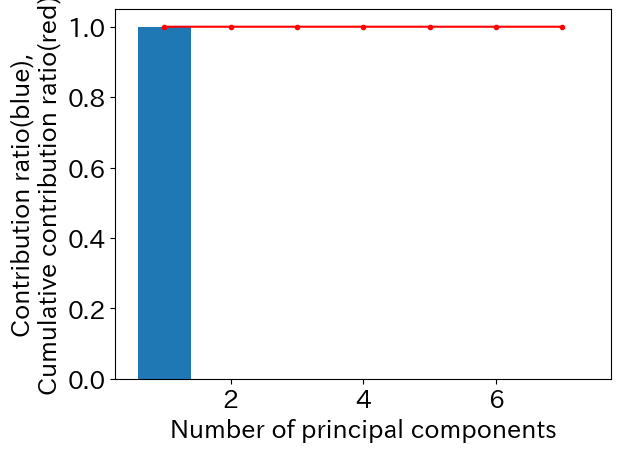

In [24]:
cont_cumcont_ratios = pd.concat([contribution_ratios, cumulative_contribution_ratios], axis=1).T
cont_cumcont_ratios.index = ['contribution_ratio', 'cumulative_contribution_ratio']  # 行の名前を変更
# 寄与率を棒グラフで、累積寄与率を線で入れたプロット図を重ねて描画
x_axis = range(1, contribution_ratios.shape[0] + 1)  # 1 から成分数までの整数が x 軸の値
plt.rcParams['font.size'] = 18
plt.bar(x_axis, contribution_ratios.iloc[:, 0], align='center')  # 寄与率の棒グラフ
plt.plot(x_axis, cumulative_contribution_ratios.iloc[:, 0], 'r.-')  # 累積寄与率の線を入れたプロット図
plt.xlabel('Number of principal components')  # 横軸の名前
plt.ylabel('Contribution ratio(blue),\nCumulative contribution ratio(red)')  # 縦軸の名前。\n で改行しています
plt.show()

In [27]:
# 第 1 主成分と第 2 主成分の散布図 (band_gap の値でサンプルに色付け)
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=tab10, cmap=plt.get_cmap('jet'))
clb = plt.colorbar()
clb.set_label('band_gap', labelpad=-20, y=1.1, rotation=0)
plt.xlabel('t1')
plt.ylabel('t2')
plt.show()

NameError: name 'tab10' is not defined

In [58]:

f_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-2.121384e+08,-8.202865e+06,139482.070709,510469.115587,-57755.825809,-38867.074780,-50692.977263,-12425.926384,1228.347427,1493.150206,511.224404
1,-3.424041e+07,-8.598015e+06,122485.260355,429724.193544,42853.280495,-21411.797763,-41702.964271,-11723.520772,-3007.322145,1419.844307,226.649123
2,-2.616025e+08,-7.878118e+06,11619.900677,394489.457877,155941.072724,-17360.314577,-26820.648539,-12391.489005,-645.180833,-19.155276,586.436213
3,-3.413438e+08,-7.644942e+06,87166.689954,290148.433694,-40108.490925,-34505.224073,-17758.081837,-11000.327208,1823.928451,1074.569426,-468.728650
4,-3.408999e+08,-7.572653e+06,94373.940072,221108.395758,-42042.781180,-18512.558137,-5250.205839,-13126.662385,538.480377,1449.416578,221.839174
...,...,...,...,...,...,...,...,...,...,...,...
68,6.426105e+09,-6.207425e+06,137527.765743,-185647.909819,-231294.602856,-15422.818895,-20483.491772,-7510.867955,-4306.060972,2193.188177,-2007.356795
69,3.867538e+09,9.923430e+05,375475.322872,-1930.217772,57889.920872,-28532.588061,-28048.957785,-15201.784074,-5783.889728,-2371.768955,4663.736771
70,8.880361e+08,9.064239e+06,-393276.920560,266170.064075,236354.585842,-1474.601552,55933.122144,-41831.600197,-374.868367,-11023.412687,1018.608717
71,-2.630793e+08,1.336998e+07,101687.894920,64918.150674,-125671.891191,-80120.150823,56175.849559,-43625.927960,-2109.152171,7833.233515,789.988989


In [104]:


from catboost import CatBoostClassifier
    
#data_2 = data_2.pct_change(periods=1)
#US_Bond = US_Bond[1:]

for j in range(0, 1):
    value2=0
    n_components=11
    data3 = data_2[['AIB', 'Receipts', 'AID', 'SLGS', 'DS', 'NUAI', 'PAB', 'GAS', 'NUAD',
       'PAI', 'SBI']]
    pca = PCA(n_components=n_components)
    pca.fit(data3.iloc[:, :n_components].values)
    f_df = pd.DataFrame(pca.transform(data_2.iloc[:, :n_components].values), columns=['PC'+str(i) for i in range(1, n_components+1)])
    train_len = 7


    #namelist = [['Receipts', 'AID', 'NUAI', 'AIPA']]
    #namelist = [['PAD', 'NUAI', 'NUAD', 'NUAB']]
    namelist = ['NUAB', 'DS', 'Receipts', 'PAB'] 

    df = f_df.iloc[:, :]

    # 欠損値を列の1つ手前の値で埋める
    df = df.dropna(how='any').dropna(how='all', axis=0)
    df = df.fillna(method='ffill')
    X = df.values

    USBond_change = np.where(US_Bond[1:] > US_Bond[0:-1], 1, 0)

    USBond_change = np.append(USBond_change,1)   # adjustment, not being used


    y = USBond_change


    df = df.dropna(how='any').dropna(how='all', axis=0)
    for num in range(5, 100, 5):
        df = df.fillna(method='ffill')
        X = df.values







        y_test = []
        rate_prediction = []

        result = []
        result = pd.DataFrame(result)
        for i in range(len(y)-train_len+1):
            X_train = X[0:train_len+i-1,:]    # train until previous period, cuz y is forecasting next period
            y_train = y[0:train_len+i-1]
            X_predict = X[0:train_len+i,:] # use most recent reporting period for forecasting

            # Winsorize top 1% and bottom 1% of points.
            # Apply on X_train and X_test separately
            X_train = mstats.winsorize(X_train, limits = [0.01, 0.01])
            X_predict = mstats.winsorize(X_predict, limits = [0.01, 0.01])

            sc = StandardScaler()
            # Fit to training data and then transform it
            X_train = sc.fit_transform(X_train) # SVM is unsuitable to raw larger-scale number, However, Standard saves this.
            X_predict = sc.transform(X_predict) 

            y_test.append(y[train_len+i-1]) # 6, 7, 8, 9, 10, 11.......

            # Initialize svm, rbf is a default kernel
            classifier_rbf = SVC(C=80, kernel = 'rbf', gamma = 'auto', random_state=0)


            # Fit the model on training data

            # Make a prediction on testing data
            try:
                classifier_rbf.fit(X_train, y_train)
                y_pred_rbf = classifier_rbf.predict(X_predict[train_len -1+i,:].reshape(1,-1))
            except:
                pass


            rate_prediction = np.append(rate_prediction,y_pred_rbf)





        result['predict'] = rate_prediction


        from sklearn.metrics import matthews_corrcoef
        value= matthews_corrcoef(y_test, rate_prediction)
        if value < value2:
            continue
        else:
            value2 = value

        if value2>0.19:
            print('corr:',value2, num, data3.columns, j)


    result.index = [i+timedelta(days=1) for i in post_fundamental.index[train_len-1:]]



corr: 0.2540106951871658 5 Index(['AIB', 'Receipts', 'AID', 'SLGS', 'DS', 'NUAI', 'PAB', 'GAS', 'NUAD',
       'PAI', 'SBI'],
      dtype='object') 0
corr: 0.2540106951871658 10 Index(['AIB', 'Receipts', 'AID', 'SLGS', 'DS', 'NUAI', 'PAB', 'GAS', 'NUAD',
       'PAI', 'SBI'],
      dtype='object') 0
corr: 0.2540106951871658 15 Index(['AIB', 'Receipts', 'AID', 'SLGS', 'DS', 'NUAI', 'PAB', 'GAS', 'NUAD',
       'PAI', 'SBI'],
      dtype='object') 0
corr: 0.2540106951871658 20 Index(['AIB', 'Receipts', 'AID', 'SLGS', 'DS', 'NUAI', 'PAB', 'GAS', 'NUAD',
       'PAI', 'SBI'],
      dtype='object') 0
corr: 0.2540106951871658 25 Index(['AIB', 'Receipts', 'AID', 'SLGS', 'DS', 'NUAI', 'PAB', 'GAS', 'NUAD',
       'PAI', 'SBI'],
      dtype='object') 0
corr: 0.2540106951871658 30 Index(['AIB', 'Receipts', 'AID', 'SLGS', 'DS', 'NUAI', 'PAB', 'GAS', 'NUAD',
       'PAI', 'SBI'],
      dtype='object') 0
corr: 0.2540106951871658 35 Index(['AIB', 'Receipts', 'AID', 'SLGS', 'DS', 'NUAI', 'PAB', 'GAS'

In [ ]:
11

In [78]:
f_df.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
PC1,1.000000,0.880793,0.880886,0.880497,0.881037,-0.875011,-0.655776,0.885181,0.684321,0.004093,0.954951
PC2,0.880793,1.000000,0.999998,0.999999,0.999998,-0.999887,-0.917440,0.999930,0.931400,0.394034,0.950582
PC3,0.880886,0.999998,1.000000,0.999999,1.000000,-0.999883,-0.917269,0.999936,0.931236,0.393615,0.950717
PC4,0.880497,0.999999,0.999999,1.000000,0.999997,-0.999902,-0.917788,0.999921,0.931714,0.394826,0.950307
PC5,0.881037,0.999998,1.000000,0.999997,1.000000,-0.999874,-0.917055,0.999941,0.931038,0.393116,0.950884
PC6,-0.875011,-0.999887,-0.999883,-0.999902,-0.999874,1.000000,0.923234,-0.999654,-0.936667,-0.407544,-0.945881
PC7,-0.655776,-0.917440,-0.917269,-0.917788,-0.917055,0.923234,1.000000,-0.912894,-0.998670,-0.725492,-0.748652
PC8,0.885181,0.999930,0.999936,0.999921,0.999941,-0.999654,-0.912894,1.000000,0.927357,0.383957,0.954021
PC9,0.684321,0.931400,0.931236,0.931714,0.931038,-0.936667,-0.998670,0.927357,1.000000,0.701545,0.772987
PC10,0.004093,0.394034,0.393615,0.394826,0.393116,-0.407544,-0.725492,0.383957,0.701545,1.000000,0.090758


In [16]:
print(a)

PCA(n_components=7)


In [ ]:
model = CatBoostClassifier(max_depth=6,
                    learning_rate=0.002,
                    verbose=False,
                    iterations=1000,
                    loss_function='Logloss', 
                    boosting_type='Ordered')

In [12]:
1126 

〇corr: 0.15498260496951669 Index(['NUAB', 'DS', 'Receipts', 'PAB'], dtype='object') 45
    
    ['NUAD', 'AII', 'PAD', 'NUAI']


SyntaxError: invalid syntax (3867901671.py, line 3)

In [105]:
# Export data to CSV file
export = True
file_path = './prediction/'
file_name = "1222Test"
file_extension = '.csv'

#     new_copy.to_csv(file_path + file_name + file_extension)
if export:
    data = result
    data.to_csv(file_path + file_name + file_extension)

In [106]:
result

,predict
2007-05-01,1.0
2007-08-01,1.0
2007-11-01,0.0
2008-02-01,0.0
2008-05-01,1.0
...,...
2022-11-01,1.0
2023-02-01,0.0
2023-05-01,1.0
2023-08-01,1.0
